# Image Noise Simulation and Denoising Evaluation

## Importing Libraries

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import random

## Load Images

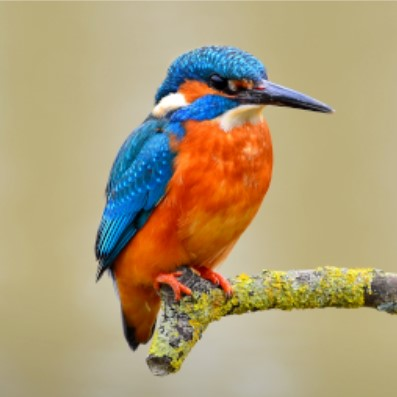

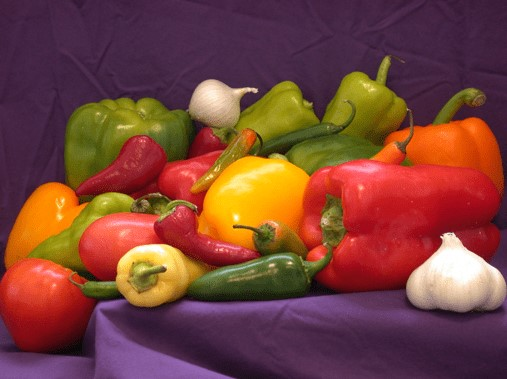

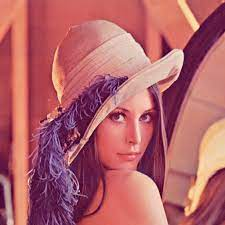

In [7]:
bird = cv2.imread('bird.jpg')
vegtables = cv2.imread('vegetables.jpg')
woman = cv2.imread('woman.jpg')
cv2_imshow(bird)
cv2_imshow(vegtables)
cv2_imshow(woman)

## Evaluating Image Denoising Using SSIM and PSNR

In [8]:
mean = 0
std_devs = np.arange(1, 50)

ssim_bird_values = []
psnr_bird_values = []

ssim_vegtables_values = []
psnr_vegtables_values = []

ssim_woman_values = []
psnr_woman_values = []

for std_dev in std_devs:
    bird_noisy = bird + np.random.normal(mean, std_dev, bird.shape).astype(np.uint8)
    vegtables_noisy = vegtables + np.random.normal(mean, std_dev, vegtables.shape).astype(np.uint8)
    woman_noisy = woman + np.random.normal(mean, std_dev, woman.shape).astype(np.uint8)

    bird_denoised = cv2.fastNlMeansDenoisingColored(bird_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
    vegtables_denoised = cv2.fastNlMeansDenoisingColored(vegtables_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
    woman_denoised = cv2.fastNlMeansDenoisingColored(woman_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

    ssim_bird = ssim(bird, bird_denoised, win_size=3)
    ssim_bird_values.append(ssim_bird)
    psnr_bird = psnr(bird, bird_denoised)
    psnr_bird_values.append(psnr_bird)

    ssim_vegtables = ssim(vegtables, vegtables_denoised, win_size=3)
    ssim_vegtables_values.append(ssim_vegtables)
    psnr_vegtables = psnr(vegtables, vegtables_denoised)
    psnr_vegtables_values.append(psnr_vegtables)

    ssim_woman = ssim(woman, woman_denoised, win_size=3)
    ssim_woman_values.append(ssim_woman)
    psnr_woman = psnr(woman, woman_denoised)
    psnr_woman_values.append(psnr_woman)

## Visualizing SSIM and PSNR for Denoised Images

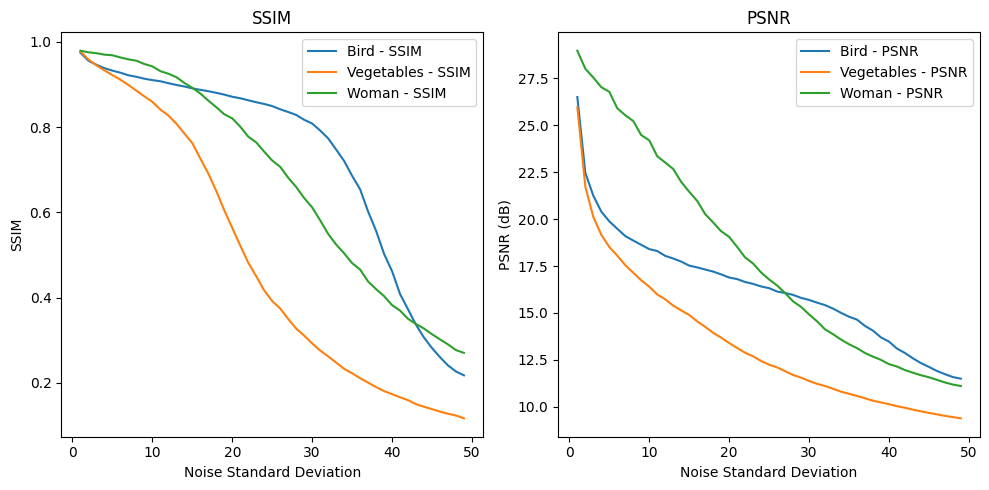

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(std_devs, ssim_bird_values, label='Bird - SSIM')
plt.plot(std_devs, ssim_vegtables_values, label='Vegetables - SSIM')
plt.plot(std_devs, ssim_woman_values, label='Woman - SSIM')
plt.xlabel('Noise Standard Deviation')
plt.ylabel('SSIM')
plt.title('SSIM')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(std_devs, psnr_bird_values, label='Bird - PSNR')
plt.plot(std_devs, psnr_vegtables_values, label='Vegetables - PSNR')
plt.plot(std_devs, psnr_woman_values, label='Woman - PSNR')
plt.xlabel('Noise Standard Deviation')
plt.ylabel('PSNR (dB)')
plt.title('PSNR')
plt.legend()

plt.tight_layout()
plt.show()

## Effect of Gaussian Noise and Denoising on Images

Gaussian with std_dev=5


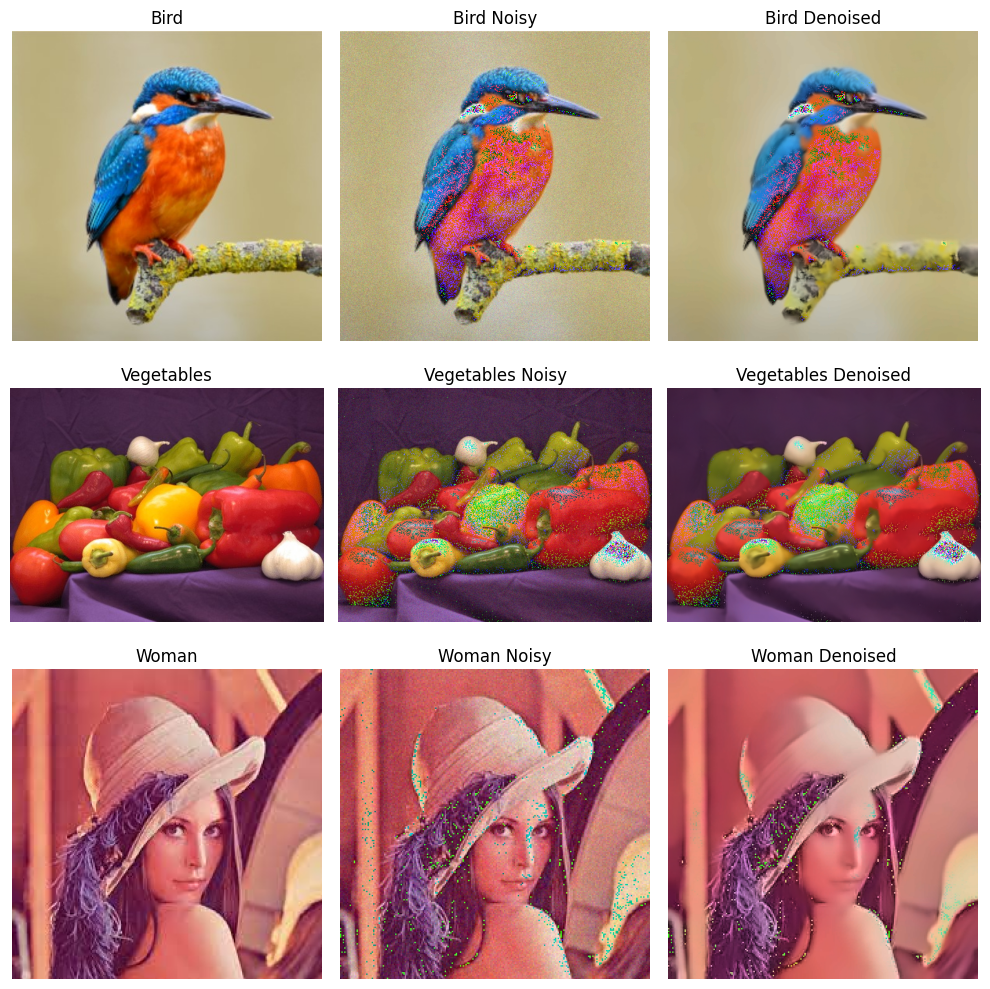

In [10]:
std_dev = 10
print(f'Gaussian with std_dev={5}')

bird_noisy = bird + np.random.normal(mean, std_dev, bird.shape).astype(np.uint8)
vegtables_noisy = vegtables + np.random.normal(mean, std_dev, vegtables.shape).astype(np.uint8)
woman_noisy = woman + np.random.normal(mean, std_dev, woman.shape).astype(np.uint8)

bird_denoised = cv2.fastNlMeansDenoisingColored(bird_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
vegtables_denoised = cv2.fastNlMeansDenoisingColored(vegtables_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
woman_denoised = cv2.fastNlMeansDenoisingColored(woman_noisy, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)


plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(bird, cv2.COLOR_BGR2RGB))
plt.title('Bird')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(bird_noisy, cv2.COLOR_BGR2RGB))
plt.title('Bird Noisy')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(bird_denoised, cv2.COLOR_BGR2RGB))
plt.title('Bird Denoised')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(vegtables, cv2.COLOR_BGR2RGB))
plt.title('Vegetables')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(vegtables_noisy, cv2.COLOR_BGR2RGB))
plt.title('Vegetables Noisy')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(vegtables_denoised, cv2.COLOR_BGR2RGB))
plt.title('Vegetables Denoised')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(woman, cv2.COLOR_BGR2RGB))
plt.title('Woman')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(woman_noisy, cv2.COLOR_BGR2RGB))
plt.title('Woman Noisy')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(woman_denoised, cv2.COLOR_BGR2RGB))
plt.title('Woman Denoised')
plt.axis('off')

plt.subplot(3, 3, 9)

plt.tight_layout()
plt.show()